<p align="center">
<img src="https://github.com/datacamp/python-live-training-template/blob/master/assets/datacamp.svg?raw=True" alt = "DataCamp icon" width="50%">
</p>
<br><br>

## **Working with text data in Python**

Welcome to this hands-on training where you will beging to learn how to work with text data in Python! We will primarily use `pandas` string methods in this training, but will also use some `matplotlib` for visualization. In this session you will learn:

- How to explore and visualize your text data.
- How to manipulate and clean text data for further analysis.
- The basics of regex, and how to use it to filter a DataFrame.
- How to use prepare a template that is easily reusable.

## **The Dataset**

The dataset to be used in this webinar is a CSV file named `wine_reviews.csv`, which contains data on wine reviews. In particular, it contains the following columns:

**Columns**:

`country`: The country that the wine is from

`description`: The review.

`designation`: The vineyard within the winery.

`points`: The number of points awarded to the wine on a scale from 1-100.

`province`: The province or state where the ine originated from.

`region`: The wine growing area within the province or state.

`variety`: The type of grapes used to make the wine.

In [36]:
# Load packages
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set pandas columns to display at max width
pd.set_option('display.max_colwidth', -1)

# Set seaborn aesthetic features to pretty up our plots
sns.set()

## Import wine data, and look at the first five rows
Let's first import the data which is stored in the csv `wine_reviews.csv` and inspect it. We will use:
- `.read_csv()` to read the csv file as a DataFrame.
- `.head()` to view the first five rows.

In [64]:
wine_df = pd.read_csv('https://github.com/jsaddlemyer/python-live-training-text_data/blob/master/data/wine_reviews.csv?raw=true')
wine_df.head()

,country,description,designation,points,price,province,region,variety,winery
0,US,"This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.",Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet sauvignon,Heitz
1,US,"Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar.",Special Selected Late Harvest,96,90.0,California,Knights Valley,sauvignon blanc,Macauley
2,US,"This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. Tannins are polished to a fine sheen, and frame a finish loaded with dark chocolate and espresso. Drink now through 2032.",Reserve,96,65.0,Oregon,Willamette Valley,PINOT NOIR,Ponzi
3,US,"This re-named vineyard was formerly bottled as deLancellotti. You'll find striking minerality underscoring chunky black fruits. Accents of citrus and graphite comingle, with exceptional midpalate concentration. This is a wine to cellar, though it is already quite enjoyable. Drink now through 2030.",Silice,95,65.0,Oregon,Chehalem Mountains,Pinot noir,Bergström
4,US,"The producer sources from two blocks of the vineyard for this wine—one at a high elevation, which contributes bright acidity. Crunchy cranberry, pomegranate and orange peel flavors surround silky, succulent layers of texture that present as fleshy fruit. That delicately lush flavor has considerable length.",Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Pinot noir,Blue Farm


**Observation:** It looks as though there are a variety of different cases in the `variety` column, which we will need to address later.

Exploring the data
---
First, now that we have an idea how our data is structured, and a little bit about what it contains, let's dig into the details a bit more. To do so, we will use: 
- `.info()` method on the DataFrame to learn about the data types and missing values.
- `.sort_values()` to reorder the DataFrame by a given series.
- `.unique()` to access the unique values.

In [38]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4131 entries, 0 to 4130
Data columns (total 9 columns):
country        4131 non-null object
description    4131 non-null object
designation    2792 non-null object
points         4131 non-null int64
price          4131 non-null float64
province       4131 non-null object
region         4131 non-null object
variety        4131 non-null object
winery         4131 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 290.6+ KB


**Observation:** The two numeric columns, points and price, are correctly specified as integers and floats. However, it appears as though there are a lot of missing values for the designation column, which specifies what winery the wine originated from.

In [39]:
# Access the variety column, sort them alphabetically, and select only the unique values
wine_df['variety'].sort_values().unique()

array([' BORDEAUX-STYLE RED BLEND', ' Bordeaux-style red blend',
       ' CABERNET SAUVIGNON', ' CHARDONNAY', ' Cabernet sauvignon',
       ' Chardonnay', ' MERLOT', ' Merlot', ' PINOT NOIR', ' Pinot noir',
       ' RED BLEND', ' RIESLING', ' Red blend', ' Riesling',
       ' SAUVIGNON BLANC', ' SYRAH', ' Sauvignon blanc', ' Syrah',
       ' bordeaux-style red blend', ' cabernet sauvignon', ' chardonnay',
       ' merlot', ' pinot noir', ' red blend', ' riesling',
       ' sauvignon blanc', ' syrah', 'BORDEAUX-STYLE  RED  BLEND',
       'BORDEAUX-STYLE RED BLEND', 'BORDEAUX-STYLE RED BLEND ',
       'Bordeaux-style  red  blend', 'Bordeaux-style red blend',
       'Bordeaux-style red blend ', 'CABERNET  SAUVIGNON',
       'CABERNET SAUVIGNON', 'CABERNET SAUVIGNON ', 'CHARDONNAY',
       'CHARDONNAY ', 'Cabernet  sauvignon', 'Cabernet sauvignon',
       'Cabernet sauvignon ', 'Chardonnay', 'Chardonnay ', 'MERLOT',
       'MERLOT ', 'Merlot', 'Merlot ', 'PINOT  NOIR', 'PINOT NOIR',
      

**Observation:** Due to extra spaces and inconsistencies in case, there are many duplicate entries of wine varieties that we will need to address.

---
## Q&A 1
---

## Cleaning the data
As observed when exploring data, the `designation` column has missing values. One strategy to follow could be filling missing values with the name of the winery attached with `'- unknown'`. To fill out missing values, we can use the `.fillna()` method which takes in the following argument:
- Here we will pass the `winery` series of our DataFrame, and then concatenate `- unknown`.
- We will also use the `inplace` argument to apply this operation directly to our DataFrame.

But first, let's go over string concatenation. In the example below, we join the word `"the"` with our `x` variable containing `"winery"`, and separate the two words by also adding a space (`" "`).

In [65]:
# Create two variables storing the words of interest
x = "winery"

y = "the"

# Combine the words with a space
y + " " + x

'the winery'

In [62]:
# Fill our designation column with the name of the winery and 'unknown'
wine_df['designation'].fillna(wine_df['winery'] + " - unknown", inplace=True)

# Sample the DataFrame to see the result
wine_df.sample(5)

,country,description,designation,points,price,province,region,variety,winery
3096,US,"This demonstrates, as well as any other example, that exceptional wines were made in the often-maligned 2011 vintage. Cranberry, raspberry, cola and allspice elements are woven gracefully in a lovely wine that closes with just a faint, beguiling whiff of smoke.",Estate Justina,93,85.0,Oregon,Chehalem Mountains,pinot noir,Alloro
1596,France,"The wood aging is still showing in this young wine that needs time. Dry, firm and toasty, it also has the light, fruity character of the 2013 vintage with raspberry, blueberry and acidity that's still too intense. Drink from 2016.",Château de Laborde,85,12.0,Bordeaux,Bordeaux,bordeaux-style red blend,Producta Vignobles
2545,US,"Syrah can be expressive even when slightly green, as it is here. Strawberry and raspberry fruit flavors are set amidst sharp, slightly chalky, citrusy acids. Best to drink this with grilled meats.",Griffin Creek - unknown,86,40.0,Oregon,Rogue Valley,SYRAH,Griffin Creek
1951,US,"This is the most substantial of the winery's 2012 Pinots, with black cherry and cola flavors dominant. There's a hint of gun metal and a lick of chocolate wrapping into a short, rather thin finish.",Palmer Creek Vineyard,87,48.0,Oregon,Eola-Amity Hills,Pinot noir,Et Fille
4040,US,"This young Pinot is tight and stubbornly hard, showing some rhubarb and pepper scented fruit, with just a hint of raspberry. It's underscored with a quick, slightly chalky, tannic finish.",Confero,86,35.0,Oregon,Willamette Valley,pinot noir,Aberrant Cellars


In [61]:
# Use .info() again to ensure that we have no more missing values
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4131 entries, 0 to 4130
Data columns (total 9 columns):
country        4131 non-null object
description    4131 non-null object
designation    2792 non-null object
points         4131 non-null int64
price          4131 non-null float64
province       4131 non-null object
region         4131 non-null object
variety        4131 non-null object
winery         4131 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 290.6+ KB


**Observation:** Currently, there are a number of location attributes scattered across columns. While it is useful to have them separately, let's also make a column that combines this data into a useful `location` column. 

In particular, let's take the first two characters of the `country` name, and then combine them with the `region`. To do so, we will use:
- String concatenation, which we used earlier.
- The `.str.upper()` method, which returns an uppercase version of the string.
- String indexing (which we will go over below):

In [66]:
# Print out the first letter of x (which is storing 'winery')
x[0]

'w'

In [67]:
# Print out the first four letters
x[0:4]

'wine'

In [68]:
# Print from the fourth letter until the end
x[4:]

'ry'

In [69]:
# Create a location column, and assign to it the region, 
# a hyphen, and the first two characters of the country column in upper case
wine_df['location'] =  wine_df['region']+ " - " + wine_df['country'].str[0:2].str.upper()

# Check our data with a random sample
wine_df.sample(5)

,country,description,designation,points,price,province,region,variety,winery,location
1290,US,"Vanilla and caramel show right away on the nose of this bottling, followed by stewed blackberry and black plum sauce, proving quite jammy but layered with burnt sugar aromas. Blackberry pie in a vanilla crust is the flavor that pops on the palate, along with black plum and all manner of purple fruit and flower.",Limed-Edition,89,25.0,California,Paso Robles,merlot,Four Sisters Ranch,Paso Robles - US
3310,France,"This perfumed wine has a rustic edge that should blow away as the wine matures. For the fruit, it is red-berry time: bright, soft and lifted by gentle tannins and lively acidity. The wine will improve for a few more months, so drink from late 2017.",Champ Gibault,87,28.0,Loire Valley,Coteaux du Giennois,Pinot noir,Florian Roblin,Coteaux du Giennois - FR
1154,US,"Apple blossom, lemon butter and white peach aromas show on the nose of this very clean and crisp bottling. There is solid acidity and grippy texture to the palate, where sea salt, caramel apple and more white peach flavors arise. Great sizzle on the finish.",NaN,89,15.0,California,Monterey County,chardonnay,Bridlewood,Monterey County - US
2056,France,"This 20-acre estate has produced a firm but already attractively ripe wine. It is still young and juicy, with black currant flavors dominating. The tannins are solid and need a while to soften. Drink from 2016.",NaN,86,26.0,Bordeaux,Côtes de Bourg,bordeaux-style red blend,Château le Piat,Côtes de Bourg - FR
1855,US,"Spicy, meaty flavors like black pepper and beef broth blend with substantial fruit flavors in this medium-bodied, dry and rather sophisticated wine. It's almost a meal in itself, and well-balanced.",Ungrafted,89,14.0,California,Lodi,red blend,Ghostrider,Lodi - US


Great! One final step remains before we can begin looking at trends. Our `variety` column is a bit of a mess! Let's use a variety of string functions provided by pandas to set the varieties to lowercase, strip leading and trailing spaces, and replace any double spaces with single spaces!

To do this, we will use (in order):
- `series.str.strip()`: remove trailing and leading spaces.
- `series.str.lower()`: convert the string to lowercase.
- `series.str.replace()`: replace a given string with another.

In [70]:
# Remove leading and trailing spaces from the variety column
wine_df['variety'] = wine_df['variety'].str.strip()

# Set the variety names to lower case
wine_df['variety'] = wine_df['variety'].str.lower()

# Replace all double spaces with single spaces
wine_df['variety'] = wine_df['variety'].str.replace("  ", " ")

In [71]:
# Double check that we have a sensible list of wine varieties
wine_df['variety'].sort_values().unique()

array(['bordeaux-style red blend', 'cabernet sauvignon', 'chardonnay',
       'merlot', 'pinot noir', 'red blend', 'riesling', 'sauvignon blanc',
       'syrah'], dtype=object)

---
## Q&A 2
---

## Let's build a wordcloud!
---
Okay, we have some cleaned data, it's time to start exploring these reviews and learning what we can about wines. One common way of getting a visualization of text data is through a word cloud. Here, we will use:
- `STOPWORDS`: a set of common words to eliminate from our wordcloud.
- `.join()`: a method by which we can join together all of the reviews in our dataset so that we have one set of text for the wordcloud.
- `WordCloud()`: a function to generate a wordcloud from a given set of text.
- Some `matplotlib.pyplot` functions to show our wordcloud, turn off the axis, and call the plot.

In [74]:
# Assign the built-in set of STOPWORDS to a variable stopwords, and preview it
stopwords = STOPWORDS
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'drink',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'flavor',
 'flavors',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',


**Observation:** As you can see, this set contains the type of words that are common and not particularly informative for our purposes (we want to learn about wine!).

In [73]:
# Join all the reviews by a space
text = " ".join(wine_df['description'])

# Preview first 2000 characters to see whether reviews have been joined
text[0:2000]

"This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030. Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar. This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. Tannins are polished to a fine sheen, and frame a finish loaded with dark chocolate and espresso.

Initial arguments for our first wordcloud:
- `collocations`: whether we include bigrams of words (e.g. "the wine") or just unigrams (e.g. "wine").
    - In this wordcloud, our stopwords are only built for individual words, rather than bigrams. So let's turn this off.
- `width` and `height`: width and height of the wordcloud canvas
- `background_color`: the color of the background
- `stopwords`: words that will be eliminated from the wordcloud (in this case, the common ones we loaded in earlier)

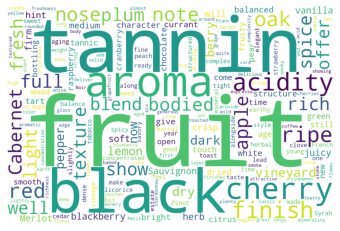

In [49]:
wordcloud = WordCloud(
    collocations=False, 
    width = 1200, height = 800, 
    background_color="white", 
    stopwords=stopwords)
    
wordcloud.generate(text)

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

1. We can update our set of `stopwords` by calling `.update()`, passing in a list of words that we don't want to appear in the wordcloud.

2. We can update the background color by updating the `background_color` argument.

3. Lastly, we can update the size of the wordcloud by specifying the figure size in `plt.figure()`. Wordcloud is built upon `matplotlib`, so we can adjust figure characteristics by using our `plt` alias for `matplotlib.pyplot`.

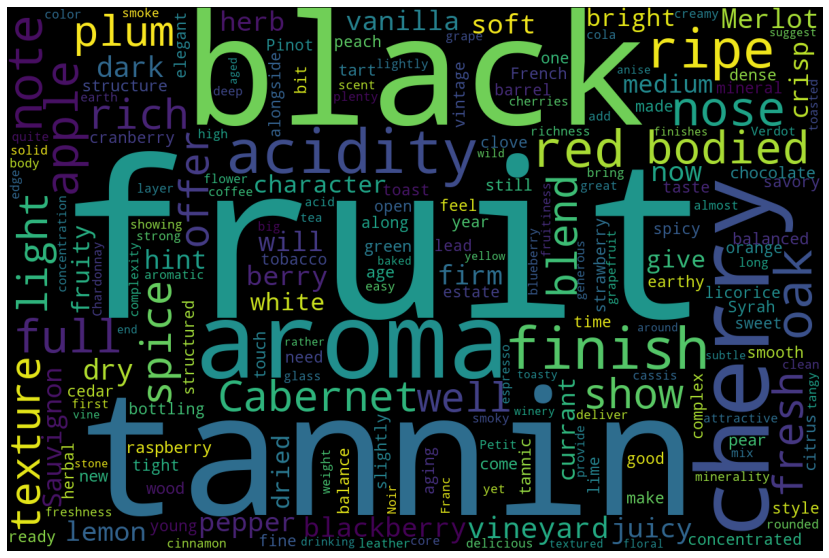

In [50]:
# Update our stopwords with words that aren't too interesting to us
stopwords.update(["flavor", "flavors", "wine", "drink", "palate"])

# Generate our wordcloud, but change the background color
wordcloud = WordCloud(
    collocations=False, 
    width = 1200, height = 800, 
    background_color="black", 
    stopwords=stopwords)

wordcloud.generate(text)

# Display the wordcloud, but with update size
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Searching for specific strings
Wordclouds are great starting steps, but to really explore our data we will probably want to be able to search it. Let's do some basic searches for mentions of oak in the `description` column of the DataFrame.
- `series.str.contains()` will return a Boolean whether a given pattern or string is found in the string of the series. It is based off of `re.search`. 
    - For now, we will use the optional parameters `case` and `regex` to ensure that our search is _not_ case sensitive, and to specify that we are not using a regular expression pattern, and instead simply a string.

In [18]:
# Create our Boolean filter
oak_filter = wine_df['description'].str.contains('oak', case=False, regex=False)

# Filter our DataFrame using our oak_filter and look at the first five rows
wine_df[oak_filter][0:5]

,country,description,designation,points,price,province,region,variety,winery,location
0,US,"This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.",Martha's Vineyard,96,235.0,California,Napa Valley,cabernet sauvignon,Heitz,Napa Valley - US
2,US,"This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. Tannins are polished to a fine sheen, and frame a finish loaded with dark chocolate and espresso. Drink now through 2032.",Reserve,96,65.0,Oregon,Willamette Valley,pinot noir,Ponzi,Willamette Valley - US
9,US,"This blockbuster, powerhouse of a wine suggests blueberry pie and chocolate as it opens in the glass. On the palate, it's smooth and seductively silky, offering complex cedar, peppercorn and peppery oak seasonings amidst its dense richness. It finishes with finesse and spice.",Rainin Vineyard,95,325.0,California,Diamond Mountain District,cabernet sauvignon,Hall,Diamond Mountain District - US
14,US,"Focused and dense, this intense wine captures the essence of ripe raspberries. Aged in 50% new French oak, it's got a strong vein of coffee and mocha. The flavors broaden out and penetrate, finishing with highlights of cedar, cinnamon and dark chocolate. Drink now through the 2020s, but decant if you want the full expression.",Abetina,94,105.0,Oregon,Willamette Valley,pinot noir,Ponzi,Willamette Valley - US
17,US,"Steely and perfumed, this wine sees only 20% new French oak, remaining vibrantly fresh. Baked apple and lemon pith veer into grapefruit on the palate, with spiciness to the finish that's both brash and loud.",Babushka,90,37.0,California,Russian River Valley,chardonnay,Zepaltas,Russian River Valley - US


That's a bit more like it! Okay, one word that pops out to me is 'tannin', which is a new word to me.

**Observation:** Take a look at the first result. Although the review does make reference to being aged in `oak`, it also references the wine coming from `Oakville`. Thus, there may be a risk that our query is grabbing descriptions that contain Oakville, and not oak.

**_noun_** <br>
1. _Chemistry._ any of a group of astringent vegetable principles or compounds, chiefly complex glucosides of catechol and pyrogallol, as the reddish compound that gives the tanning properties to oak bark or the whitish compound that occurs in large quantities in nutgalls **(common tannin, tannic acid)**.
2. any of these compounds occurring in wine and imparting an astringent taste, especially in red wine.

_Courtesy of dictionary.com_

Introduction to Regular Expressions
---
We could add a space after `'oak'` to ensure that we don't get Oakville, but what about when the word ends a sentence, or `'oakiness'` and `'oaky'`? Enter regular expressions, which allow us to define patterns to find and extract text.

Regular expressions are strings that make use of normal and special characters to help define a pattern which we can then compare to our text of interest. Here, we will make use of a few special characters to write a pattern for `oak` and related adjectives. But first, let's try out some simple examples by using the digit special character.

`\d`: Matches any digit character (i.e. 0-9)

`{}`: Quantifies the number of matches. 
- `{1,5}` will match between 1 and 5.
- `{2,}` will match at least two.

There are many more special characters we can use to write complex regular expression (or regex) patterns, but let's see what we can do with what we have learned so far. We will make use of the `re` package:
- `findall()` will find all matches of our patterns in a test string.

In [51]:
# Create a very contrived test string
test_string = """
This tremendous 100% varietal wine hails from Oakville 
and was aged over three years in oak. Juicy red-cherry fruit 
and a compelling hint of caramel greet the palate, framed by elegant, 
fine tannins and a subtle 20% minty tone in the background. 
Balanced and rewarding from start to finish, 
it has years ahead of it to develop further nuance. There are absolutely no
bad tannins in this wine. But there is a tasy tannin.
Enjoy 2022–2030."""

# Let's find all digits in this review
re.findall("\d", test_string)

['1', '0', '0', '2', '0', '2', '0', '2', '2', '2', '0', '3', '0']

In [52]:
# Let's find all years represented in the format XXXX in this review
re.findall("\d\d\d\d", test_string)

['2022', '2030']

In [53]:
# Let's find all percentages (with between 1 and 3 digits, followed by a percentage sign)
re.findall("\d{1,3}%", test_string)

['100%', '20%']

Let's expand a bit on some other special characters before diving back into our dataset!

`\w`: Matches any alphanumeric character or underscore (i.e. A-Z, a-z, 0-9, \_)

`+`: Matches between 1 or more of the preceding character.

`?`: Matches 0 or more of the preceding character.

In [54]:
# Find all mentions of tannin (or tannins), as well as the word that precedes it for context
re.findall("\w+ tannins?", test_string)

['fine tannins', 'bad tannins', 'tasy tannin']

Let's move on to a more complex example, and refine our search for any mention of oak!

1. First, we want to ensure that it is preceded by a space, because there may be cases where a word contains the same characters (e.g. `'cloak`'). We do this by using the `\s` character class, which matches any white space, such as spaces, tabs, and line breaks.

```
\s
```

2. We then want to search for a capitalized or non-capitalized `'o'`. To do this, we can use a character set `[]`, which matches any character in the square brackets. We then add `'a'` and `'k'` as these characters will be in every variant of oak we want to search for.

```
[Oo]ak
```

3. Next, we want to allow our search to include `'iness'`, `'y'`, or any additional punctuation or white space. We can do this using capturing groups and alternation. Here, we use one large capturing group, and then search for any of the inner groups using `|`. So the first set of bracketed characters look for `'iness'`, the second set looks for `y`, and then we use a character set that allows for a period, a comma, or white space.
```
((iness)|(y)|[/.,\s])
```

Putting the pieces together, we now have a pattern that will capture all references to oak that we expect to find, while also not matching with words like `'Oakville'`. Let's add these together, and then assign them to the variable `oak_pattern`.

In [22]:
# Search for a white space, 
    # followed by any case 'o', 'ak', 
    # and ending in 'iness', 'y', or a period, comma, or whitespace.
oak_pattern = '\s[Oo]ak((iness)|y|[/.,\s])'

**Note:** It is always a good idea to test that your regular expression is returning the results that you would expect, especially when you are working with longer and more complex patterns. There are many resources online where you can test patterns, such as www.regexr.com
Here, we will use:
- `re.search()`: returns a match object if it finds an occurence of the pattern, and `NULL` if it doesn't.

In [57]:
# Use our pattern to search a string that contains Oakville but not explicitly oak
x = re.search(oak_pattern, "This tremendous 100% varietal wine hails from Oakville.")

# If a match is found, let us know!
if x:
    print("Yes, an oak match!")
else:
    print("No, oak isn't here!")

No, oak isn't here!


In [58]:
# Use our pattern to search a string that contains a reference to something being 'oaky'
x = re.search(oak_pattern, "This tremendous wine is oaky.")

# If a match is found, let us know!
if x:
    print("Yes, an oak match!")
else:
    print("No, oak isn't here!")

Yes, an oak match!


In [59]:
# View the first (and only) match
x[0]

' oaky'

Filtering the DataFrame using regex to find interesting patterns
---
Now that we have a functioning pattern, we can use it to gain insights about the oakiness of wines. First, we use our pattern to filter the DataFrame, again using `str.contains()`, but this time using a regular expression.

We can assign this filtered DataFrame to a new one, titled `oak_wines`, which we can use for further analyses. Let's also call `.head()` to do a sense check on the new DataFrame.

In [60]:
# Filter our DataFrame for descriptions matching our pattern, and assign to `oak_wines`
oak_wines = wine_df[wine_df['description'].str.contains(oak_pattern)]

# View the first five rows of our new DataFrame
oak_wines.head()

,country,description,designation,points,price,province,region,variety,winery
0,US,"This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.",Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet sauvignon,Heitz
2,US,"This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. Tannins are polished to a fine sheen, and frame a finish loaded with dark chocolate and espresso. Drink now through 2032.",Reserve,96,65.0,Oregon,Willamette Valley,PINOT NOIR,Ponzi
9,US,"This blockbuster, powerhouse of a wine suggests blueberry pie and chocolate as it opens in the glass. On the palate, it's smooth and seductively silky, offering complex cedar, peppercorn and peppery oak seasonings amidst its dense richness. It finishes with finesse and spice.",Rainin Vineyard,95,325.0,California,Diamond Mountain District,CABERNET SAUVIGNON,Hall
14,US,"Focused and dense, this intense wine captures the essence of ripe raspberries. Aged in 50% new French oak, it's got a strong vein of coffee and mocha. The flavors broaden out and penetrate, finishing with highlights of cedar, cinnamon and dark chocolate. Drink now through the 2020s, but decant if you want the full expression.",Abetina,94,105.0,Oregon,Willamette Valley,PINOT NOIR,Ponzi
17,US,"Steely and perfumed, this wine sees only 20% new French oak, remaining vibrantly fresh. Baked apple and lemon pith veer into grapefruit on the palate, with spiciness to the finish that's both brash and loud.",Babushka,90,37.0,California,Russian River Valley,chardonnay,Zepaltas


Wonderful! Now, let's start to get an idea of the ratios of oakiness between varieties of wines. Let's start by grouping our two DataFrames, `oak_wines` and `wine_df` by the variety and counting the number of references.

To do this, we will change a few methods. First, we will `groupby()` the `variety`, then we will aggregate by `count()`. We will then select one of the columns (all of the columns of the DataFrame will contain count values, so we can choose anything). Lastly, we will `sort_index` so that we have an alphabetically sorted index to use for plotting.

We can use `display()` to view the two series to ensure that we have the grouping we would expect.

In [27]:
oak_grouped = oak_wines.groupby('variety').count()['country'].sort_index(ascending=False)
wine_grouped = wine_df.groupby('variety').count()['country'].sort_index(ascending=False)

display(oak_grouped)
display(wine_grouped)

variety
syrah                       27 
sauvignon blanc             23 
riesling                    5  
red blend                   97 
pinot noir                  172
merlot                      35 
chardonnay                  175
cabernet sauvignon          165
bordeaux-style red blend    21 
Name: country, dtype: int64

variety
syrah                       237 
sauvignon blanc             291 
riesling                    202 
red blend                   536 
pinot noir                  1033
merlot                      149 
chardonnay                  696 
cabernet sauvignon          527 
bordeaux-style red blend    460 
Name: country, dtype: int64

Let's start by doing a simple plot of the grouped DataFrames. By overlaying the `oak_grouped` data over the `wine_grouped` data, we can get a rough visualization of the ratios of oaky wines. To do this, we will use `matplotlib.pyplot.barh` to make two horizontal barplots.

In addition to specifying `y` values (the indexes of the series) and the values (the relevant series) for the plot, we can use different colors and set a title to make the plot easier to interpret.

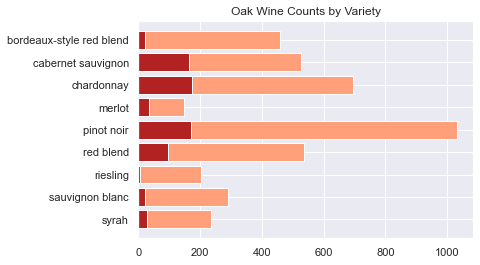

In [28]:
plt.barh(wine_grouped.index.values, wine_grouped, color='lightsalmon')
plt.barh(oak_grouped.index.values, oak_grouped, color='firebrick')
plt.title("Oak Wine Counts by Variety")
plt.show()

Clearly there are some varieties that are more likely to be described as oaky than others. Let's create a Boolean (True/False) column called `'oaky'` using our pattern, and then use a `groupby()` to calculate the percentage of each variety that is described as oaky.

When calculating the `.mean()` of a Boolean column, `pandas` treats True as 1 and False as 0, which allows us to easily generate the percentage of each variety that has been described as oaky. `sort_values()` orders the resulting series to be easier to plot.

In [29]:
wine_df['oaky'] = wine_df['description'].str.contains(oak_pattern)
oak_freq = wine_df.groupby('variety').mean()['oaky'].sort_values()
oak_freq

variety
riesling                    0.024752
bordeaux-style red blend    0.045652
sauvignon blanc             0.079038
syrah                       0.113924
pinot noir                  0.166505
red blend                   0.180970
merlot                      0.234899
chardonnay                  0.251437
cabernet sauvignon          0.313093
Name: oaky, dtype: float64

Finally, let's plot our results to have a visual representation of the oakiness of different wine varieities.

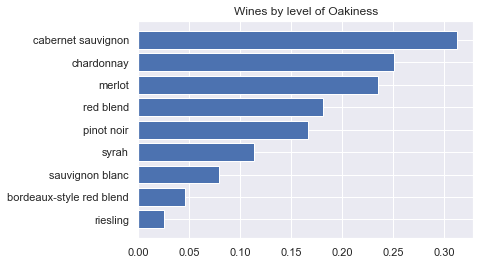

In [30]:
plt.barh(oak_freq.index, oak_freq)
plt.title("Wines by level of Oakiness")
plt.show()

Finally, let's produce some replicable output!
---
Let's create some variables from our filtered datasets, and use these to write a replicable expression that adapts based on new data.

We can get the number of mentions of oak and the total number of reviews by using the `len()` function on the two respective DataFrames.

Next, we can grab the wine with the highest percentage of oak mentions by using `.idmax()` on our `oak_freq` series. `idmax()` will return the index of the row with the highest value (i.e. the name of the wine variety).

In [31]:
oak_num = len(oak_wines)
wine_num = len(wine_df)

oak_wine = oak_freq.idxmax()

Okay, now let's embed our three variables into an fstring. Fstrings allow us to insert our variables into strings using curly brackets `{}`. We simply need to add an `f` as a prefix to our string. Here, we assign the fstring to the variable `text`, and call it inside a print function.

We now have a simple and dynamic summary of our data!

In [32]:
text = f"There were {oak_num} mentions of 'oak' from amongst {wine_num} reviews. The most oaky wine was {oak_wine}."
print(text)

There were 720 mentions of 'oak' from amongst 4131 reviews. The most oaky wine was cabernet sauvignon.


Text-ellent! We now have code with variables embedded within the string. ALet's test what happens if we make up some new values for these variables and run the code again.

In [33]:
oak_num = 834
wine_num = 5103
oak_wine = 'chardonnay'

text = f"There were {oak_num} mentions of 'oak' from amongst {wine_num} reviews. The most oaky wine was {oak_wine}."
print(text)

There were 834 mentions of 'oak' from amongst 5103 reviews. The most oaky wine was chardonnay.


## What's next?
Now that you have started your Pythonic-text journey, there are a variety of more advanced topics for you to tackle!

<a href = "https://learn.datacamp.com/courses/regular-expressions-in-python"><img src = "https://assets.datacamp.com/production/course_17118/shields/original/shield_image_course_17118_20200109-1-1b7rdip?1578597449" width=100pt align=left></a><br><br>&nbsp;&nbsp;&nbsp;**Further Experience with Regular Expressions**

<a href = "https://learn.datacamp.com/courses/sentiment-analysis-in-python"><img src = "https://assets.datacamp.com/production/course_16852/shields/original/shield_image_course_16852_20190816-1-1drnml4?1565953559" width=100pt align=left></a><br><br>&nbsp;&nbsp;&nbsp;**Sentiment Analysis**

<a href = "https://learn.datacamp.com/courses/feature-engineering-for-machine-learning-in-python"><img src = "https://assets.datacamp.com/production/course_14336/shields/original/shield_image_course_14336_20190428-1-1s1qt3h?1556485075" width=100pt align=left></a><br><br>&nbsp;&nbsp;&nbsp;**Feature Engineering for Machine Learning**

<a href = "https://learn.datacamp.com/courses/introduction-to-natural-language-processing-in-python"><img src = "https://assets.datacamp.com/production/course_3629/shields/original/shield_image_course_3629_20200424-1-1jg2tak?1587716990" width=100pt align=left></a><br><br>&nbsp;&nbsp;&nbsp;**Natural Language Processing**